**Introduction**

This lesson and the next make use of what are known as unsupervised learning algorithms. Unsupervised algorithms don't make use of a target; instead, their purpose is to learn some property of the data, to represent the structure of the features in a certain way. In the context of feature engineering for prediction, you could think of an unsupervised algorithm as a "feature discovery" technique.

Clustering simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithm makes "birds of a feather flock together," so to speak.

When used for feature engineering, we could attempt to discover groups of customers representing a market segment, for instance, or geographic areas that share similar weather patterns. Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.

**k-Means Clustering**

There are a great many clustering algorithms. They differ primarily in how they measure "similarity" or "proximity" and in what kinds of features they work with. The algorithm we'll use, k-means, is intuitive and easy to apply in a feature engineering context. Depending on your application another algorithm might be more appropriate.

K-means clustering measures similarity using ordinary straight-line distance (Euclidean distance, in other words). It creates clusters by placing a number of points, called centroids, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The "k" in "k-means" is how many centroids (that is, clusters) it creates. You define the k yourself.

You could imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a Voronoi tessallation. The tessallation shows you to what clusters future data will be assigned; the tessallation is essentially what k-means learns from its training data.

The clustering on the Ames dataset above is a k-means clustering. Here is the same figure with the tessallation and centroids shown.

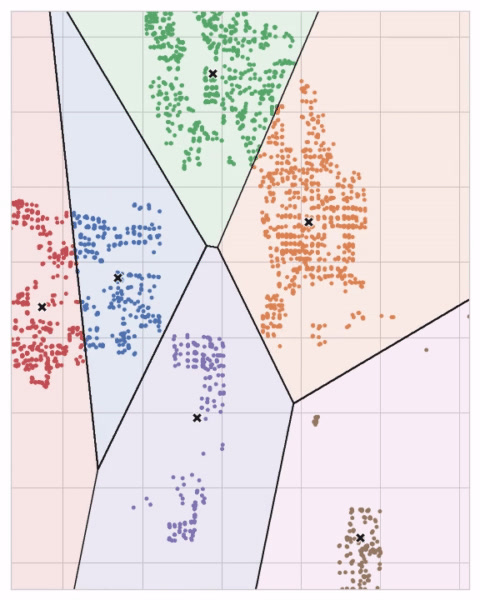

Let's review how the k-means algorithm learns the clusters and what that means for feature engineering. We'll focus on three parameters from scikit-learn's implementation: n_clusters, max_iter, and n_init.

It's a simple two-step process. The algorithm starts by randomly initializing some predefined number (n_clusters) of centroids. It then iterates over these two operations:

assign points to the nearest cluster centroid
move each centroid to minimize the distance to its points
It iterates over these two steps until the centroids aren't moving anymore, or until some maximum number of iterations has passed (max_iter).

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times (n_init) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.

The animation below shows the algorithm in action. It illustrates the dependence of the result on the initial centroids and the importance of iterating until convergence.

The K-means clustering algorithm on Airbnb rentals in NYC.

You may need to increase the max_iter for a large number of clusters or n_init for a complex dataset. Ordinarily though the only parameter you'll need to choose yourself is n_clusters (k, that is). The best partitioning for a set of features depends on the model you're using and what you're trying to predict, so it's best to tune it like any hyperparameter (through cross-validation, say)

**Example - California Housing**

As spatial features, California Housing's 'Latitude' and 'Longitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [59]:
data = pd.read_csv('housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
X = data[['MedInc', 'Latitude', 'Longitude']]

X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


When applying K-means clustering using the scikit-learn library, the input data should typically be of numeric data types (e.g., integer or floating-point numbers). K-means is a distance-based algorithm that calculates distances between data points, and it operates on numerical features to form clusters based on these distances.

Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

K-means clustering is indeed sensitive to the scale of the data. This sensitivity can be attributed to the way K-means calculates distances between data points. When the data features are on different scales or have significantly different variances, features with larger scales can dominate the clustering process.

To mitigate this sensitivity and ensure that all features contribute more equally to the clustering process, it's a good practice to rescale or normalize the data before applying K-means clustering. There are two common techniques for this:

In [61]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a sample dataset with two features
#data = np.array([[1, 5], [2, 10], [3, 15], [4, 20], [5, 25]])

# Min-Max Scaling (Normalization)
# min_max_scaler = MinMaxScaler()
# data_min_max = min_max_scaler.fit_transform(data)

# # Standardization (Z-score normalization)
# standard_scaler = StandardScaler()
# data_standardized = standard_scaler.fit_transform(data)

# print("Original Data:")
# print(data)
# print("\nMin-Max Scaled Data:")
# print(data_min_max)
# print("\nStandardized Data:")
# print(data_standardized)


In [62]:
# Create cluster feature
Kmeans = KMeans(n_clusters=6)



Choosing the appropriate number of clusters, often denoted as n_clusters, in K-means clustering is a crucial step in the clustering process. There are several methods you can use to determine the optimal number of clusters for your dataset. Here are some commonly used techniques:

**1.Elbow Method:**

The Elbow Method involves running K-means clustering for a range of n_clusters values and plotting the within-cluster sum of squares (inertia) against the number of clusters.
You look for an "elbow point" in the plot where the inertia starts to decrease more slowly. This point indicates that adding more clusters doesn't significantly reduce the variance within each cluster.
The elbow point can be considered as the optimal n_clusters.

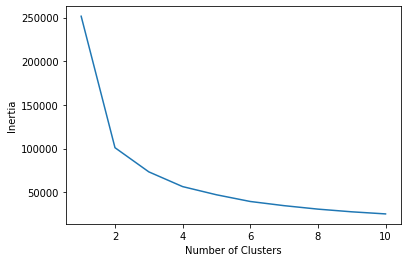

In [63]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In the resulting plot, you should visually inspect the curve and identify the point where the inertia no longer decreases significantly. This is where you can choose the corresponding n_clusters as a reasonable estimate for the optimal number of clusters.

**2. Silhouette Score:**

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
You calculate the Silhouette Score for different n_clusters and choose the number that maximizes the score.
A higher Silhouette Score indicates better-defined clusters.

In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started from 2 clusters


In [65]:
best_n_clusters, silhouette_scores

(2,
 [0.5665094919763822,
  0.5030189605750357,
  0.4248580371297608,
  0.37498601114304597,
  0.3992111073578923,
  0.3630626146747009,
  0.3438963342008992,
  0.34980495529348893,
  0.3566123772753949])

In [66]:
Kmeans = KMeans(n_clusters=7)

X['Cluster'] = Kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')


X.head(10)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1
5,4.0368,37.85,-122.25,1
6,3.6591,37.84,-122.25,1
7,3.1200,37.84,-122.25,1
8,2.0804,37.84,-122.26,1
9,3.6912,37.84,-122.25,1


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

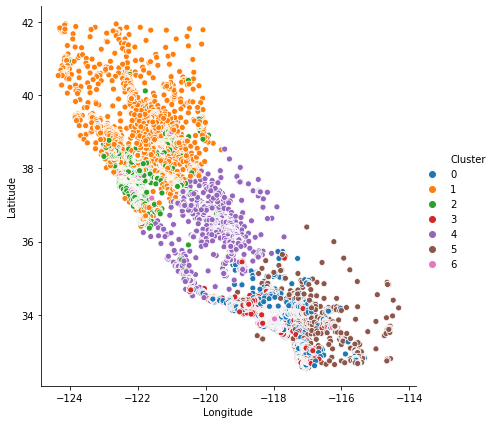

In [67]:
sns.relplot(x='Longitude', y = 'Latitude', hue= 'Cluster', data = X, height=6)
plt.show()

The target in this dataset is MedHouseVal (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across MedHouseVal, which is indeed what we see.

In [68]:
X['MedHouseVal'] = data[['MedInc']]
X.head()


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MedInc,Latitude,Longitude,Cluster,MedHouseVal
0,8.3252,37.88,-122.23,2,8.3252
1,8.3014,37.86,-122.22,2,8.3014
2,7.2574,37.85,-122.24,2,7.2574
3,5.6431,37.85,-122.25,2,5.6431
4,3.8462,37.85,-122.25,1,3.8462


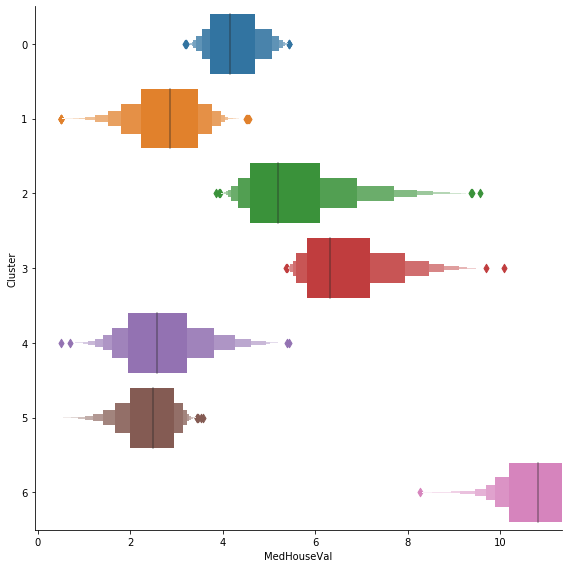

In [78]:
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=8)
plt.show()

In [80]:
ames = pd.read_csv('ames.csv')
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900
